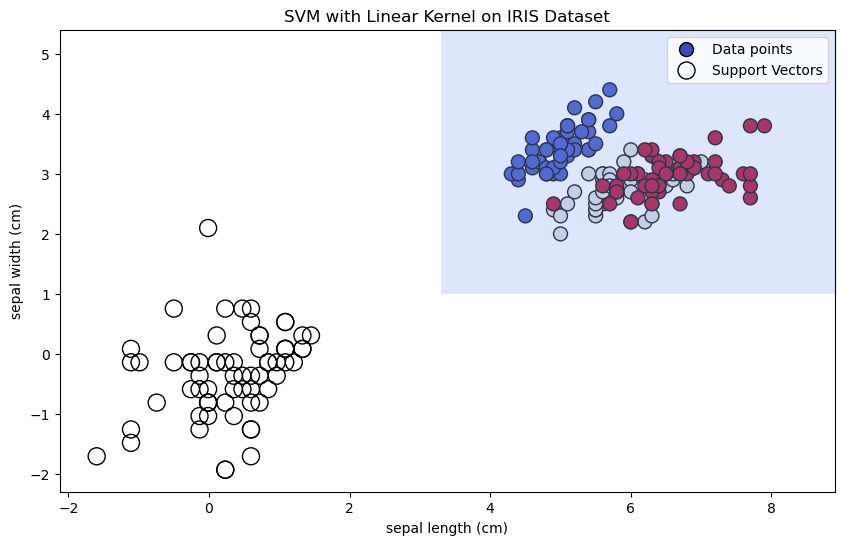

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D plotting
y = iris.target

# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the input features
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=100, label='Data points')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM with Linear Kernel on IRIS Dataset')

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.show()


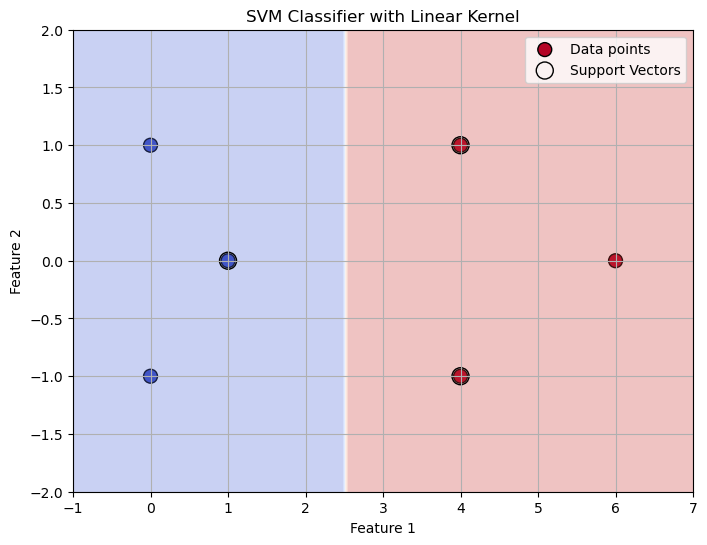

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the dataset
X = np.array([[4, 1], [4, -1], [6, 0],  # Positively labeled points
              [1, 0], [0, 1], [0, -1]])  # Negatively labeled points
y = np.array([1, 1, 1, -1, -1, -1])  # Labels: 1 for positive, -1 for negative

# Create and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the input features
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=100, label='Data points')

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier with Linear Kernel')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid()
plt.show()


/tmp/ipykernel_4911/1440628659.py:22: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, hyperplane, levels=[0], colors='blue', linewidths=2, label='Hyperplane: 1 + 2X1 + 3X2 = 0')
/tmp/ipykernel_4911/1440628659.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x1, x2, inequality, levels=[-1000, 0], colors='red', alpha=0.5, label='Region: 1 + 3X1 - X2 < 0')
/tmp/ipykernel_4911/1440628659.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x1, x2, inequality, levels=[0, 1000], colors='green', alpha=0.5, label='Region: 1 + 3X1 - X2 > 0')


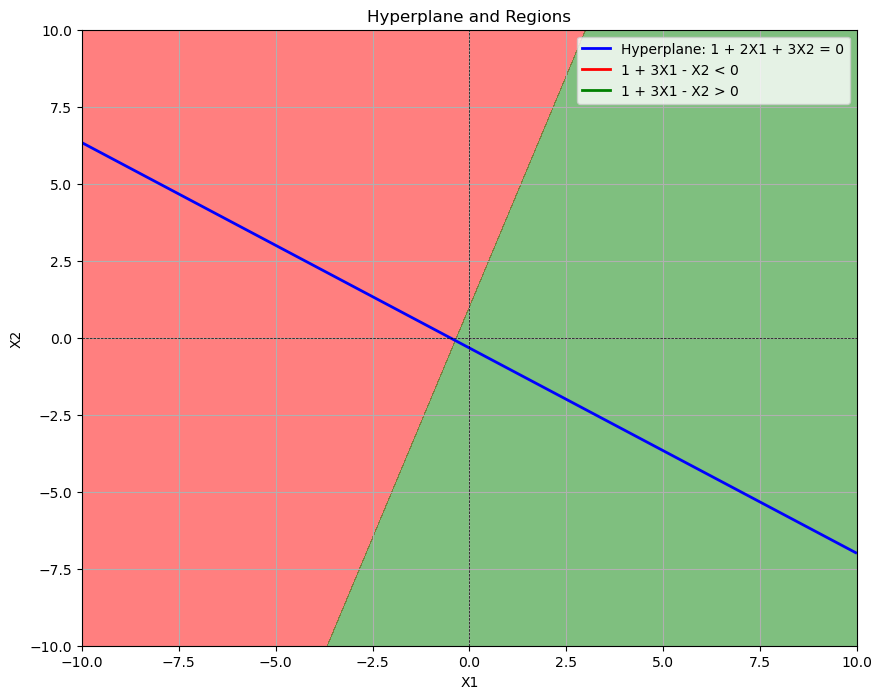

Slope: -0.6666666666666666, Intercept: -0.3333333333333333


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplane_and_regions():
    # Define the range for x1 and x2
    x1_range = np.arange(-10, 11, 1)
    x2_range = np.arange(-10, 11, 1)
    
    # Create meshgrid for plotting
    x1, x2 = np.meshgrid(x1_range, x2_range)

    # Define the hyperplane equation 1 + 2X1 + 3X2 = 0
    hyperplane = 1 + 2*x1 + 3*x2

    # Define the inequality 1 + 3X1 - X2
    inequality = 1 + 3*x1 - x2

    # Set up the plot
    plt.figure(figsize=(10, 8))

    # Plot the hyperplane
    plt.contour(x1, x2, hyperplane, levels=[0], colors='blue', linewidths=2, label='Hyperplane: 1 + 2X1 + 3X2 = 0')
    
    # Plot the inequality regions
    plt.contourf(x1, x2, inequality, levels=[-1000, 0], colors='red', alpha=0.5, label='Region: 1 + 3X1 - X2 < 0')
    plt.contourf(x1, x2, inequality, levels=[0, 1000], colors='green', alpha=0.5, label='Region: 1 + 3X1 - X2 > 0')

    # Add labels and grid
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Hyperplane and Regions')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid()

    # Legend for contours
    blue_patch = plt.Line2D([0], [0], color='blue', lw=2, label='Hyperplane: 1 + 2X1 + 3X2 = 0')
    red_patch = plt.Line2D([0], [0], color='red', lw=2, label='1 + 3X1 - X2 < 0')
    green_patch = plt.Line2D([0], [0], color='green', lw=2, label='1 + 3X1 - X2 > 0')
    plt.legend(handles=[blue_patch, red_patch, green_patch])

    plt.show()

    # Calculate slope and intercept for the hyperplane
    # Rearranging 2X1 + 3X2 = -1 gives us: X2 = (-2/3)X1 - 1/3
    slope = -2 / 3
    intercept = -1 / 3
    print(f"Slope: {slope}, Intercept: {intercept}")

# Call the function to plot
plot_hyperplane_and_regions()


/tmp/ipykernel_4911/398578012.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, hyperplane1, levels=[0], colors='blue', linewidths=2, label='Hyperplane 1: 5 + 2X1 + 5X2 = 0')
/tmp/ipykernel_4911/398578012.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, hyperplane2, levels=[0], colors='orange', linewidths=2, label='Hyperplane 2: 5 + 20X1 + 50X2 = 0')


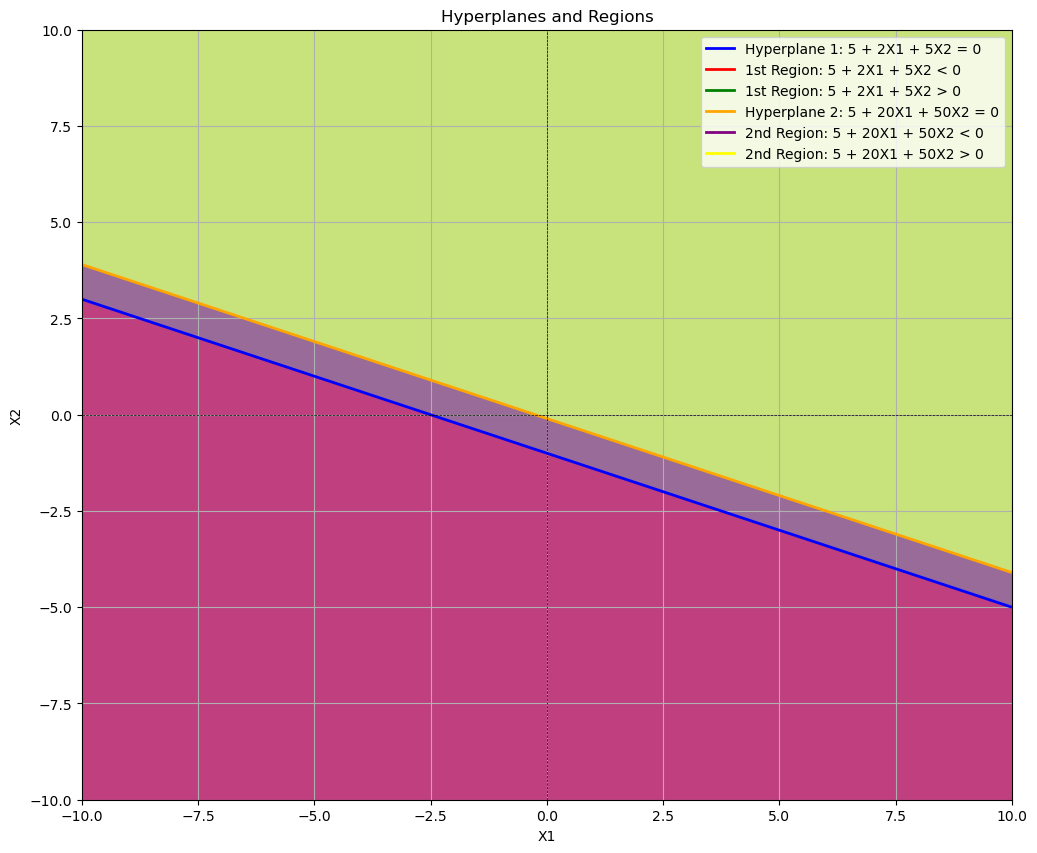

Hyperplane 1: Slope: -0.4, Intercept: -1
Hyperplane 2: Slope: -0.4, Intercept: -0.1


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplanes_and_regions():
    # Define the range for x1 and x2
    x1_range = np.arange(-10, 11, 1)
    x2_range = np.arange(-10, 11, 1)
    
    # Create meshgrid for plotting
    x1, x2 = np.meshgrid(x1_range, x2_range)

    # Define the hyperplane equations
    hyperplane1 = 5 + 2*x1 + 5*x2
    hyperplane2 = 5 + 20*x1 + 50*x2

    # Set up the plot
    plt.figure(figsize=(12, 10))

    # Plot the first hyperplane
    plt.contour(x1, x2, hyperplane1, levels=[0], colors='blue', linewidths=2, label='Hyperplane 1: 5 + 2X1 + 5X2 = 0')
    plt.contourf(x1, x2, hyperplane1, levels=[-1000, 0], colors='red', alpha=0.5)
    plt.contourf(x1, x2, hyperplane1, levels=[0, 1000], colors='green', alpha=0.3)

    # Plot the second hyperplane
    plt.contour(x1, x2, hyperplane2, levels=[0], colors='orange', linewidths=2, label='Hyperplane 2: 5 + 20X1 + 50X2 = 0')
    plt.contourf(x1, x2, hyperplane2, levels=[-1000, 0], colors='purple', alpha=0.5)
    plt.contourf(x1, x2, hyperplane2, levels=[0, 1000], colors='yellow', alpha=0.3)

    # Add labels and grid
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Hyperplanes and Regions')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()

    # Legend for contours
    blue_patch = plt.Line2D([0], [0], color='blue', lw=2, label='Hyperplane 1: 5 + 2X1 + 5X2 = 0')
    red_patch = plt.Line2D([0], [0], color='red', lw=2, label='1st Region: 5 + 2X1 + 5X2 < 0')
    green_patch = plt.Line2D([0], [0], color='green', lw=2, label='1st Region: 5 + 2X1 + 5X2 > 0')
    
    orange_patch = plt.Line2D([0], [0], color='orange', lw=2, label='Hyperplane 2: 5 + 20X1 + 50X2 = 0')
    purple_patch = plt.Line2D([0], [0], color='purple', lw=2, label='2nd Region: 5 + 20X1 + 50X2 < 0')
    yellow_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='2nd Region: 5 + 20X1 + 50X2 > 0')
    
    plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch, purple_patch, yellow_patch])

    plt.show()

    # Calculate slope and intercept for both hyperplanes
    # For Hyperplane 1: 2X1 + 5X2 = -5  => 5X2 = -2X1 - 5 => X2 = (-2/5)X1 - 1
    slope1 = -2 / 5
    intercept1 = -1

    # For Hyperplane 2: 20X1 + 50X2 = -5 => 50X2 = -20X1 - 5 => X2 = (-20/50)X1 - 1/10
    slope2 = -20 / 50
    intercept2 = -1 / 10

    print(f"Hyperplane 1: Slope: {slope1}, Intercept: {intercept1}")
    print(f"Hyperplane 2: Slope: {slope2}, Intercept: {intercept2}")

# Call the function to plot
plot_hyperplanes_and_regions()
